# Домашнее задание № 1

### Выполнил Кузнецов С.И.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LogisticRegression
%matplotlib inline

#### Загружаем датасет

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Целевая переменная
target = 'income'
df[target].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Приведем целевую переменную к числовому виду

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


*Датасет не содержит пропущенных значений*

Приведем целевую переменную к числовому виду

In [5]:
le = LabelEncoder()
le.fit(df.income)

le.classes_

array(['<=50K', '>50K'], dtype=object)

In [6]:
le.transform(['<=50K', '>50K'])

array([0, 1])

In [7]:
df['income_n'] = le.transform(df.income)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_n
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0


Разобьем исходную выборку на тренировочную и тестовую в соотношении 70% на 30% случайным образом

In [8]:
df['subset'] = pd.Series(np.random.choice(['train', 'test'], size = df.shape[0], p = [.7, .3]))
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_n,subset
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,train
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,train
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,test
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,train
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0,train


#### Обрабатываем числовые фичи

/home/sergmath/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


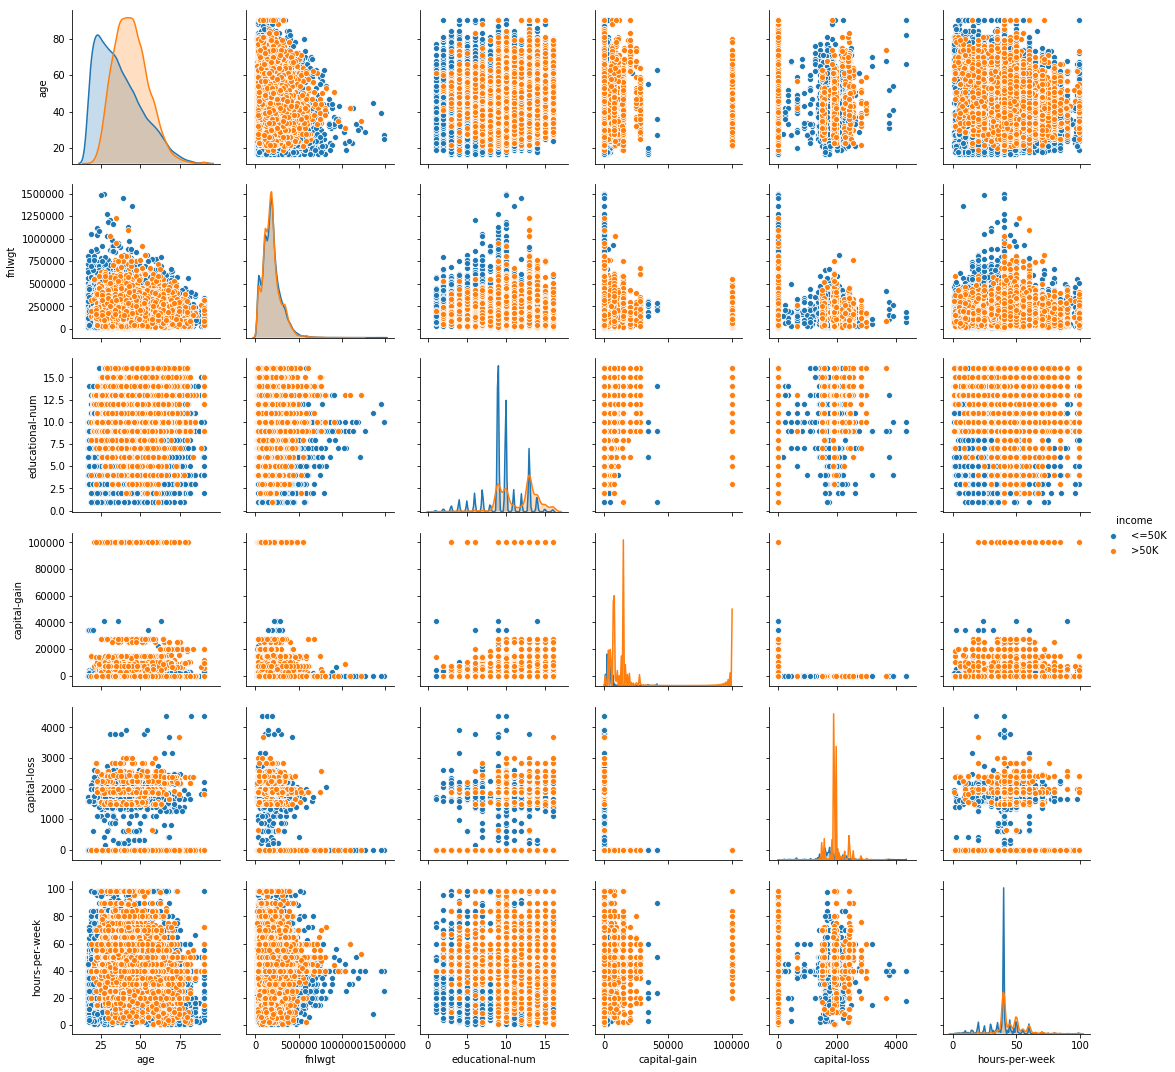

In [9]:
num_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
_ = sns.pairplot(data = df, vars = num_features, hue = 'income')

Видим, что на целевую переменную существенное влияние оказывают *возраст*, *количество образований* и *прирост капитала*.

Построим матрицу корреляций

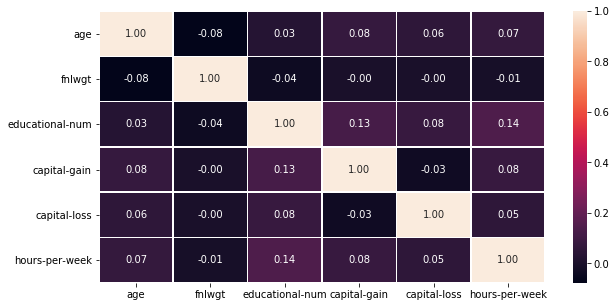

In [10]:
df_corr = df[num_features].corr()
plt.figure(figsize=(10,5))
_ = sns.heatmap(data=df_corr, 
                annot=True,
                xticklabels=df_corr.columns.values, 
                yticklabels=df_corr.columns.values,
                fmt=".2f",
                linewidths=0.5
               )

*Корреляций между числовыми фичами не выявлено*

#### Обрабатываем нечисловые фичи

Выведем статистику по нечисловым фичам

In [11]:
for c in df.columns:
    if c != target:
        if df[c].dtype == 'object':
            print(c, ':')
            print(df[c].value_counts())
            print('\n')

workclass :
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


education :
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


marital-status :
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


occupation :
Prof-specialty       6172
Craft-repair    

Фичи *native-country*, *occupation* и *education* заменим на среднее значение по обучающей выборке.

In [12]:
def get_mean_value_train(data, feature, target = 'income_n', train_test_subset = 'subset'):
    '''
    Заменяет качественную фичу f в датасете data на числовую,
    равную среднему значению целевой переменной target по качественной фиче на тренировочной выборке.
    
    data - исходный датасет
    
    f - имя качественной фичи
    
    target - имя целевой переменной
    
    train_test_subset - поле, содержащее значения 'train', если исходный экземпляр принадлежит к обучающей выборке
    и 'test' в противном случае
    
    Возвращает pandas.Series со значениями новой числовой фичи
    '''
    
    # Выделяем тренировочную выборку
    data_train = data[data[train_test_subset] == 'train']
    
    # Вычисляем средние значения целевой переменной по тренировочной выборке
    mean_value_dict = data_train.groupby(feature).agg({target:'mean'}).to_dict()['income_n']
    
    # Заменяем значения на средние во всей выборке
    return data[feature].apply(lambda x: mean_value_dict.get(x))

In [13]:
to_mean_features = {'native-country', 'occupation', 'education'}
for f in to_mean_features:
    df[f + '_mean'] = get_mean_value_train(df, f)
    
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_n,subset,occupation_mean,education_mean,native-country_mean
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,train,0.125531,0.050955,0.244278
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,train,0.121609,0.161051,0.244278
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,test,0.317348,0.261062,0.244278
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,train,0.125531,0.187410,0.244278
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0,train,0.102472,0.187410,0.244278


Остальные качественные фичи заменяем на числовые, используя *get_dummies*

In [14]:
to_get_dummies_features = [c for c in df.columns 
                           if df[c].dtype == 'object' 
                           and c not in to_mean_features 
                           and c != target
                           and c != 'subset']
to_get_dummies_features

['workclass', 'marital-status', 'relationship', 'race', 'gender']

In [15]:
df = pd.get_dummies(df, columns = to_get_dummies_features, drop_first=True)
df.columns

Index(['age', 'fnlwgt', 'education', 'educational-num', 'occupation',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_n', 'subset', 'occupation_mean', 'education_mean',
       'native-country_mean', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'gender_Male'],
      dtype='object')

Оставим в датасете только числовые фичи

In [16]:
num_features = [f for f in df.columns if df[f].dtype != 'object']
num_features

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'income_n',
 'occupation_mean',
 'education_mean',
 'native-country_mean',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'gender_Male']

#### Обучение модели

Разобьем исходную выборку на тренировочную и тестовую

In [17]:
X_train = df[df.subset == 'train'][num_features]
y_train = X_train.income_n
X_test = df[df.subset == 'test'][num_features]
y_test = X_test.income_n

X_train = X_train.drop(columns = ['income_n'], axis = 1)
X_test = X_test.drop(columns = ['income_n'], axis = 1)

In [18]:
X_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,occupation_mean,education_mean,native-country_mean,workclass_Federal-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,25,226802,7,0,0,40,0.125531,0.050955,0.244278,0,...,0,0,1,0,0,0,1,0,0,1
1,38,89814,9,0,0,50,0.121609,0.161051,0.244278,0,...,0,0,0,0,0,0,0,0,1,1
3,44,160323,10,7688,0,40,0.125531,0.187410,0.244278,0,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,10,0,0,30,0.102472,0.187410,0.244278,0,...,0,0,1,0,0,0,0,0,1,0
5,34,198693,6,0,0,30,0.045598,0.061938,0.244278,0,...,1,0,0,0,0,0,0,0,1,1


In [19]:
X_test.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,occupation_mean,education_mean,native-country_mean,workclass_Federal-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
2,28,336951,12,0,0,40,0.317348,0.261062,0.244278,0,...,0,0,0,0,0,0,0,0,1,1
6,29,227026,9,0,0,40,0.102472,0.161051,0.244278,0,...,0,0,0,1,0,0,1,0,0,1
9,55,104996,4,0,0,10,0.228271,0.069424,0.244278,0,...,0,0,0,0,0,0,0,0,1,1
16,20,444554,10,0,0,25,0.045598,0.187410,0.244278,0,...,0,0,1,0,0,0,0,0,1,1
20,34,107914,13,0,0,47,0.277668,0.415230,0.244278,0,...,0,0,0,0,0,0,0,0,1,1


In [20]:
X_train.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_mean', 'education_mean',
       'native-country_mean', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'gender_Male'],
      dtype='object')

Сожмем пространство фичей и выведем лучшие

In [21]:
ls = Lasso().fit(X_train, y_train)
print(ls.intercept_)
print(ls.coef_)

0.1546954042289087
[ 1.19085687e-03 -2.69545794e-09  0.00000000e+00  1.32987888e-05
  1.53956499e-04  3.19511339e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00]


In [22]:
best_features = []
features_list = X_train.columns
for i in range(X_train.shape[1]):
    if abs(ls.coef_[i]) > 1e-7:
        best_features.append(features_list[i])

best_features

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [23]:
X_train = X_train[best_features]
X_test = X_test[best_features]

Выполним нормализацию

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/sergmath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Обучим модель на лучших фичах

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/home/sergmath/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8000820176337913

In [26]:
lr.coef_

array([[0.53051168, 2.44027499, 0.30299077, 0.5393286 ]])

**В итоге получили модель, имеющую точность 80%**